In [4]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import so_pysm_models as spm
import pysm
from astropy.io import fits
import scipy
import pymaster as nmt

In [20]:
mapfreq = 146
nside = 2048

tsz = spm.WebSkySZ(target_nside=nside,sz_type='thermal')
ksz = spm.WebSkySZ(target_nside=nside,sz_type='kinetic')
cib = spm.WebSkyCIB(target_nside=nside)

sky = pysm.Sky({})
sky.add_component("tsz",tsz);sky.add_component("ksz",ksz);sky.add_component("cib",cib);
m_tsz = sky.tsz(mapfreq); m_ksz = sky.ksz(mapfreq); m_cib = sky.cib(mapfreq)

/home/zequnl/anaconda3/lib/python3.6/site-packages/so_pysm_models-0.3.dev173-py3.6.egg/so_pysm_models/utils/__init__.py:26: UserWarning: Retrieve data for websky/0.3/tsz.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/zequnl/anaconda3/lib/python3.6/site-packages/so_pysm_models-0.3.dev173-py3.6.egg/so_pysm_models/utils/__init__.py:26: UserWarning: Retrieve data for websky/0.3/ksz.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/zequnl/anaconda3/lib/python3.6/site-packages/so_pysm_models-0.3.dev173-py3.6.egg/so_pysm_models/utils/__init__.py:26: UserWarning: Retrieve data for websky/0.3/cib_0146.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")


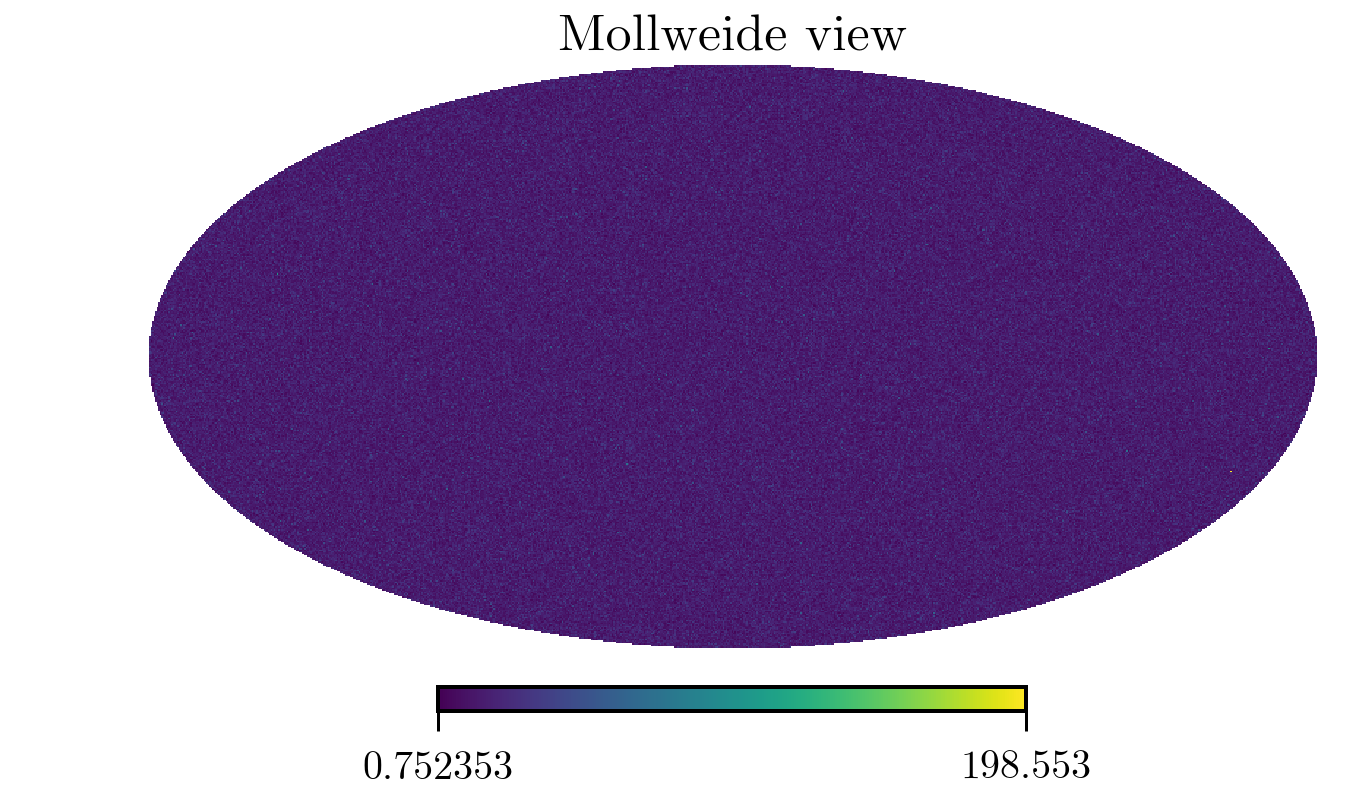

In [21]:
hp.mollview(m_cib[0,:])

In [22]:
b = nmt.NmtBin(nside, nlb=40, is_Dell=True)
mask = np.ones(hp.nside2npix(nside))

f_tsz = nmt.NmtField(mask,[m_tsz[0,0,:]], n_iter=0)
f_ksz = nmt.NmtField(mask,[m_ksz[0,0,:]], n_iter=0)
f_cib = nmt.NmtField(mask,[m_cib[0,:]], n_iter=0)

w0=nmt.NmtWorkspace()
w0.compute_coupling_matrix(f_tsz,f_tsz,b)
dl_coupled_tsz = nmt.compute_coupled_cell(f_tsz,f_tsz)
dl_coupled_ksz = nmt.compute_coupled_cell(f_ksz,f_ksz)
dl_coupled_cib = nmt.compute_coupled_cell(f_cib,f_cib)

db_tsz = w0.decouple_cell(dl_coupled_tsz)[0]
db_ksz = w0.decouple_cell(dl_coupled_ksz)[0]
db_cib = w0.decouple_cell(dl_coupled_cib)[0]

ell = b.get_effective_ells()

In [28]:
dl_coupled_tszxcib = nmt.compute_coupled_cell(f_tsz,f_cib)
db_tszxcib = w0.decouple_cell(dl_coupled_tszxcib)[0]

In [23]:
def norm_3000(ell, spec):
    return spec / np.interp(x=3000, xp=ell, fp=spec)

(0, 2.5)

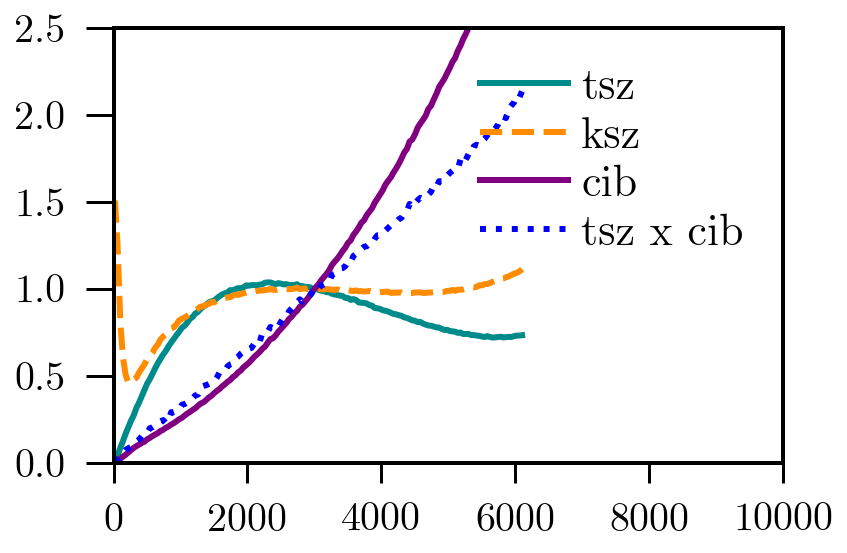

In [37]:
plt.figure(figsize=(6,4))
plt.plot(ell, norm_3000(ell, db_tsz), label='tsz', color='darkcyan' )
plt.plot(ell, norm_3000(ell, db_ksz), label='ksz', color='darkorange', ls='dashed' )
plt.plot(ell, norm_3000(ell, db_cib), label='cib', color='purple' )
plt.plot(ell, norm_3000(ell, db_tszxcib), label='tsz x cib', ls='dotted', color='blue' )
plt.legend()
plt.xlim(0,10000)
plt.ylim(0,2.5)

reference plot from Dunkley et al. 2013

![example plot](data/dunk13.png)